In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
asset_returns = pd.read_csv("/content/asset_returns.csv", index_col=0, parse_dates=True)
market_returns = pd.read_csv("/content/market_returns.csv", index_col=0, parse_dates=True)

In [5]:
asset_returns.head()

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2018-01-03,-0.010577,0.016969,-0.008191,0.003998,0.002828
2018-01-04,0.003906,-0.000953,-0.005794,0.005994,0.006968
2018-01-05,0.001987,-0.005736,-0.003354,0.003200,0.012008
2018-01-08,-0.001611,0.003987,0.023487,0.005724,0.009327
2018-01-09,0.001665,-0.004946,0.005102,0.013266,-0.001991


In [10]:
stock='RELIANCE.NS'
y=asset_returns[stock]
X=market_returns
X=sm.add_constant(X)
capm_model=sm.OLS(y,X).fit()
capm_model.params

,0
const,0.000238
^NSEI,1.102143


In [11]:
betas={}
alpha={}

for stock in asset_returns.columns:
  y=asset_returns[stock]
  x=sm.add_constant(market_returns)
  model=sm.OLS(y,x).fit()

  alpha[stock]=model.params["const"]
  betas[stock]=model.params[market_returns.columns[0]]
alpha, betas

({'HDFCBANK.NS': np.float64(-8.658066497756246e-05),
  'ICICIBANK.NS': np.float64(0.00014180977549824774),
  'INFY.NS': np.float64(0.0004385103852535204),
  'RELIANCE.NS': np.float64(0.00023815926505008103),
  'TCS.NS': np.float64(0.0004607688246493472)},
 {'HDFCBANK.NS': np.float64(1.0531653203708957),
  'ICICIBANK.NS': np.float64(1.341838328408213),
  'INFY.NS': np.float64(0.830595546158376),
  'RELIANCE.NS': np.float64(1.1021427138923563),
  'TCS.NS': np.float64(0.6918098318341626)})

In [13]:
beta_df=pd.DataFrame({
    "beta":betas,
    "alpha":alpha
})
beta_df

,beta,alpha
HDFCBANK.NS,1.053165,-0.000087
ICICIBANK.NS,1.341838,0.000142
INFY.NS,0.830596,0.000439
RELIANCE.NS,1.102143,0.000238
TCS.NS,0.691810,0.000461


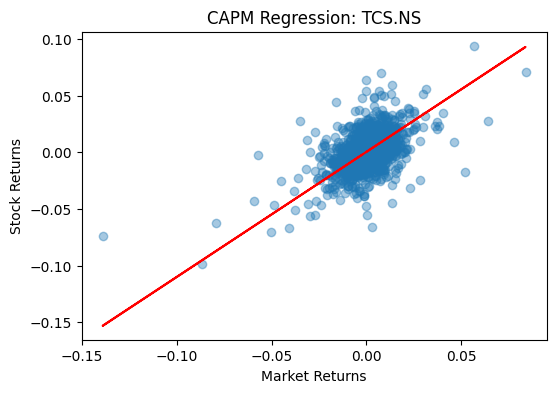

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(market_returns, asset_returns[stock], alpha=0.4)
plt.plot(market_returns, capm_model.predict(x), color="red")
plt.title(f"CAPM Regression: {stock}")
plt.xlabel("Market Returns")
plt.ylabel("Stock Returns")
plt.show()

In [30]:
rf=.05
market_mean=market_returns.mean()*252
market_mean=market_mean.iloc[0]

In [23]:
beta_df["beta"]

,beta
HDFCBANK.NS,1.053165
ICICIBANK.NS,1.341838
INFY.NS,0.830596
RELIANCE.NS,1.102143
TCS.NS,0.691810


In [36]:
capm_market_returns=rf+beta_df["beta"]*(market_mean-rf)
capm_market_returns.name="returns"
capm_market_returns

,returns
HDFCBANK.NS,0.129124
ICICIBANK.NS,0.150812
INFY.NS,0.112402
RELIANCE.NS,0.132804
TCS.NS,0.101976


In [39]:
capm_table=beta_df.copy()
capm_table["CAPM_Expected_Returns"]=capm_market_returns
capm_table

,beta,alpha,CAPM_Expected_Returns
HDFCBANK.NS,1.053165,-0.000087,0.129124
ICICIBANK.NS,1.341838,0.000142,0.150812
INFY.NS,0.830596,0.000439,0.112402
RELIANCE.NS,1.102143,0.000238,0.132804
TCS.NS,0.691810,0.000461,0.101976


In [44]:
capm_table.to_csv("/content/capm_table.csv")